<a href="https://colab.research.google.com/github/Pratim38pal/DEEP_LEARNING/blob/main/Multi_Layer_Perceptron(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoderm

In [2]:
dataset=pd.read_csv('/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


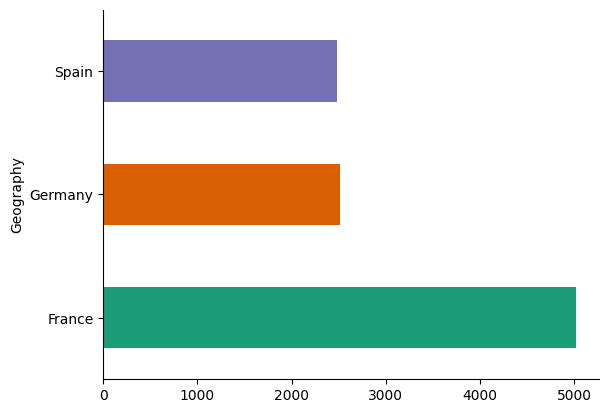

In [4]:
# @title Geography

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [12]:
input_data=dataset.iloc[:,:-1]
output_data=dataset.iloc[:,-1]

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()



In [14]:
# Convert string columns to numerical representations using one-hot encoding
input_data = pd.get_dummies(input_data,
                            columns=['Geography', 'Gender', 'Surname'], # List of columns with string values
                            drop_first=True) # Optional: Drop one column for each categorical feature to avoid multicollinearity
# Now you can scale the data
input_data = pd.DataFrame(ss.fit_transform(input_data))

In [15]:
input_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
0,-1.731878,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
1,-1.731531,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
2,-1.731185,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
3,-1.730838,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
4,-1.730492,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144


In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [20]:
ann=Sequential()

In [21]:
ann.add(Dense(units=6,input_dim=8,activation='relu'))
ann.add(Dense(units=4,activation='relu'))
ann.add(Dense(units=2,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [27]:
ann.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.1199
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9611 - loss: 0.1090
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9624 - loss: 0.1049
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9611 - loss: 0.1102
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9603 - loss: 0.1109
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9636 - loss: 0.1106
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9572 - loss: 0.1196
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9620 - loss: 0.1109
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9611 - loss: 0.1072
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9615 - loss: 0.1099


In [39]:
# Assuming your input data has 2944 features
!pip install keras
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential() # This line initializes a new Sequential object

# Now define the input shape to match your data
ann.add(Dense(units=6, input_dim=2944, activation='relu')) # Changed input_dim to 2944

ann.add(Dense(units=4, activation='relu'))
ann.add(Dense(units=2, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have your data loaded into x_train and y_train
ann.fit(x_train, y_train, batch_size=100, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8003 - loss: 0.6176
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7932 - loss: 0.5258
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7912 - loss: 0.4729
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7833 - loss: 0.4502
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7976 - loss: 0.4084
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7939 - loss: 0.3918
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7989 - loss: 0.3626
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.3507
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8061 - loss: 0.3237
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8008 - loss: 0.3280
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8496 - loss: 0.3107
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - lo

In [40]:
prd=ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [44]:
prd_data=[]
for i in prd:
  if i>0.5:
    prd_data.append(1)
  else:
    prd_data.append(0)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,prd_data)*100

66.25

In [47]:
from sklearn.metrics import accuracy_score

# Predict probabilities
prd_train = ann.predict(x_train)

# Convert probabilities to binary predictions
prd_train_data = []
for i in prd_train:
  if i > 0.5:
    prd_train_data.append(1)
  else:
    prd_train_data.append(0)

# Calculate accuracy with binary predictions
accuracy = accuracy_score(y_train, prd_train_data) * 100
print(accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
92.9125


In [50]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
6252,0.433879,-0.047942,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
4684,-0.109292,0.639799,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
1731,-1.132242,0.428032,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
4742,-0.089201,0.989724,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
4521,-0.165757,-0.584472,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,0.489304,-1.278399,-0.502117,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
8285,1.138131,-1.644728,-0.429689,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
7853,0.988481,0.774801,0.822271,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144
1095,-1.352558,-0.025852,0.429093,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759,...,-0.010001,-0.024502,-0.010001,-0.010001,-0.010001,-0.017323,-0.010001,-0.010001,-0.014144,-0.014144


In [ ]:
import numpy as np

# Ensure the input shape is correct
input_data = np.array([[-0.564197, -0.660018, -0.695982, 0.324119, 0.807737, -1.547768, -1.030670, -1.013811]])

# Check the input shape
print(f"Input shape: {input_data.shape}")

# Make the prediction
prd = ann.predict(input_data)

# Process the prediction result
prd_data = []
if prd > 0.5:
    prd_data.append(1)
else:
    prd_data.append(0)

print(prd_data)


In [60]:
# Print the model summary to understand the input shape
ann.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 6)                   │          17,670 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,135 (207.56 KB)

 Trainable params: 17,711 (69.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,424 (138.38 KB)

In [73]:
import numpy as np

# Generate dummy data with the correct shape
input_data = np.random.randn(1, 2944)

# Make the prediction
prd = ann.predict(input_data)

# Process the prediction result
prd_data = []
if prd > 0.5:
    prd_data.append(1)
else:
    prd_data.append(0)

print(prd_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1]


In [74]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Example model setup with 8 input features
model = Sequential([
    Dense(6, input_shape=(8,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Now your input data can be the 8-feature one you initially tried
input_data = np.array([[-0.564197, -0.660018, -0.695982, 0.324119, 0.807737, -1.547768, -1.030670, -1.013811]])

# Predict
prd = model.predict(input_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [75]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1
